In [1]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
everest_deaths=pd.read_csv("EverestDeaths.csv")
everest_deaths['Date']=pd.to_datetime(everest_deaths['Date'])
del everest_deaths['Name']
everest_deaths.head()

,No.,Date,Cause of death
0,1,1922-06-07,Avalanche
1,2,1922-06-07,Avalanche
2,3,1922-06-07,Avalanche
3,4,1922-06-07,Avalanche
4,5,1922-06-07,Avalanche


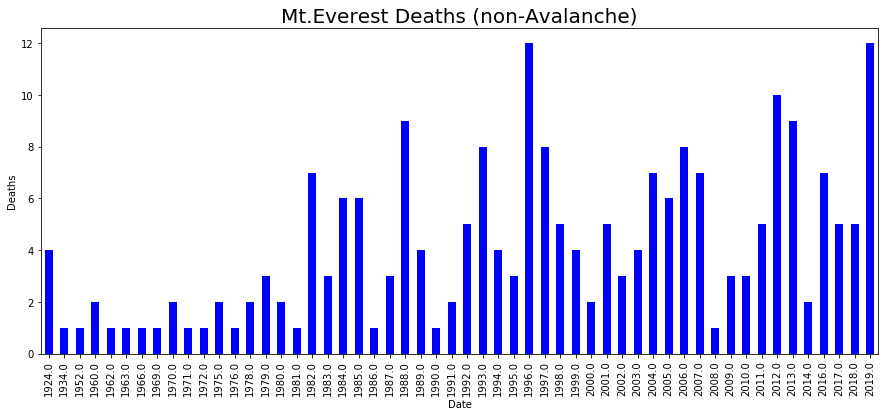

In [70]:
non_avalanche=everest_deaths[~everest_deaths['Cause of death'].isin(['Avalanche','Icefall'])]
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize']=10
fig,ax1 = plt.subplots(figsize=(15,6))
everest_deaths['Date'].groupby(non_avalanche["Date"].dt.year).count().plot(kind='bar',color='blue')
plt.title("Mt.Everest Deaths (non-Avalanche)",fontsize=20)
plt.ylabel('Deaths')
plt.savefig("non-avalcnhe.pdf", bbox_inches='tight')

In [52]:
import matplotlib.dates as mdates

Text(0.5, 0, 'Year')

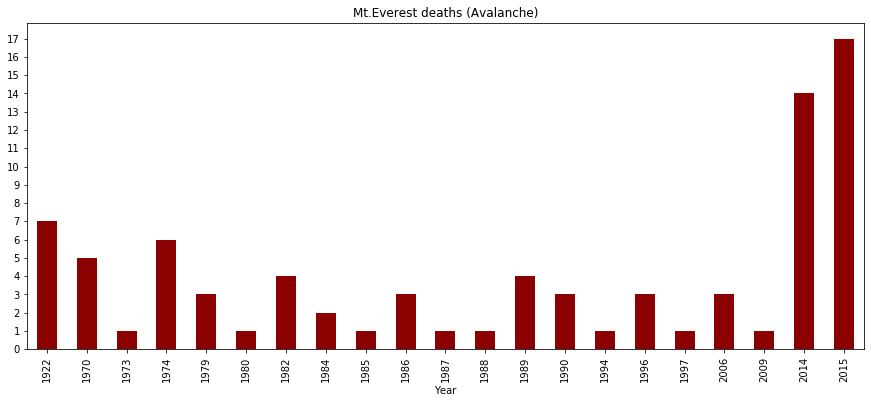

In [71]:
#label=mdates.DateFormatter('%b')
avalanche_deaths=everest_deaths[everest_deaths['Cause of death'].isin(['Avalanche','Icefall'])]
fig,ax1 = plt.subplots(figsize=(15,6))
avalanche_deaths['Date'].groupby(avalanche_deaths["Date"].dt.year).count().plot(kind='bar',color='darkred')
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title("Mt.Everest deaths (Avalanche)")
plt.xlabel('Year')

In [73]:
everest_deaths['month']=everest_deaths['Date'].dt.month
everest_deaths.head()

,No.,Date,Cause of death,month
0,1,1922-06-07,Avalanche,6
1,2,1922-06-07,Avalanche,6
2,3,1922-06-07,Avalanche,6
3,4,1922-06-07,Avalanche,6
4,5,1922-06-07,Avalanche,6


TypeError: float() argument must be a string or a number, not 'AxesSubplot'

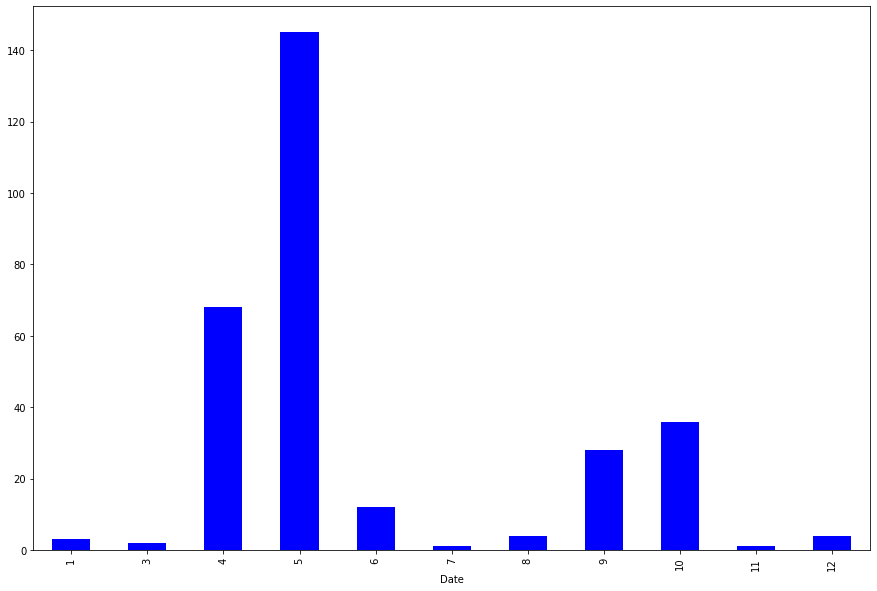

In [75]:
months = mdates.MonthLocator()  # every month
monthsFmt = mdates.DateFormatter('%b')
fig,ax = plt.subplots(figsize=(15,10))
ax.plot(everest_deaths['Date'].groupby(everest_deaths["Date"].dt.month).count().plot(kind='bar',color='blue'))
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

In [76]:
deaths_by_week=everest_deaths['Date'].groupby(everest_deaths["Date"].dt.week).count()
deaths_by_week=pd.DataFrame(deaths_by_week)
deaths_by_week.columns=['deaths']
deaths_by_week=deaths_by_week.reset_index()
deaths_by_week.columns=['week','Deaths']
deaths_by_week=deaths_by_week.sort_values('week')
#deaths_by_week['week'] = deaths_by_week['Date'].dt.week


In [78]:
deaths_by_week.head()

,week,Deaths
0,2,1
1,3,1
2,5,1
3,12,1
4,13,1


Text(0, 0.5, 'Number of Deaths')

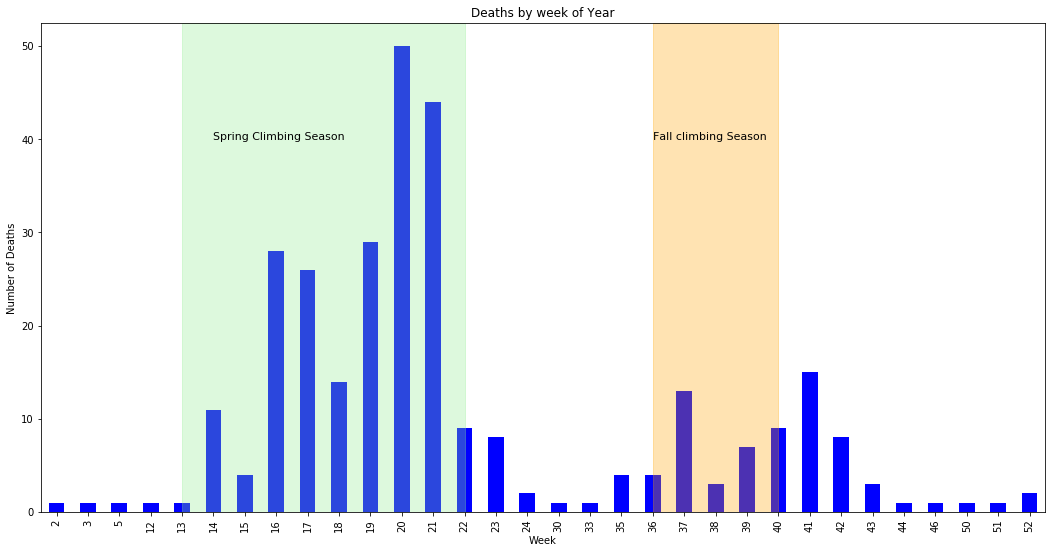

In [83]:
fig,ax = plt.subplots(figsize=(18,9))
everest_deaths['Date'].groupby(everest_deaths["Date"].dt.week).count().plot(kind='bar',color='blue')
ax.axvspan(4,13, alpha=0.3, color='lightgreen')
ax.axvspan(19,23, alpha=0.3, color='orange')
ax.text(5, 40, "Spring Climbing Season", fontsize=11)
ax.text(19, 40, "Fall climbing Season", fontsize=11)
plt.title("Deaths by week of Year")
plt.xlabel("Week")
plt.ylabel("Number of Deaths")


Text(0.5, 0, 'Week')

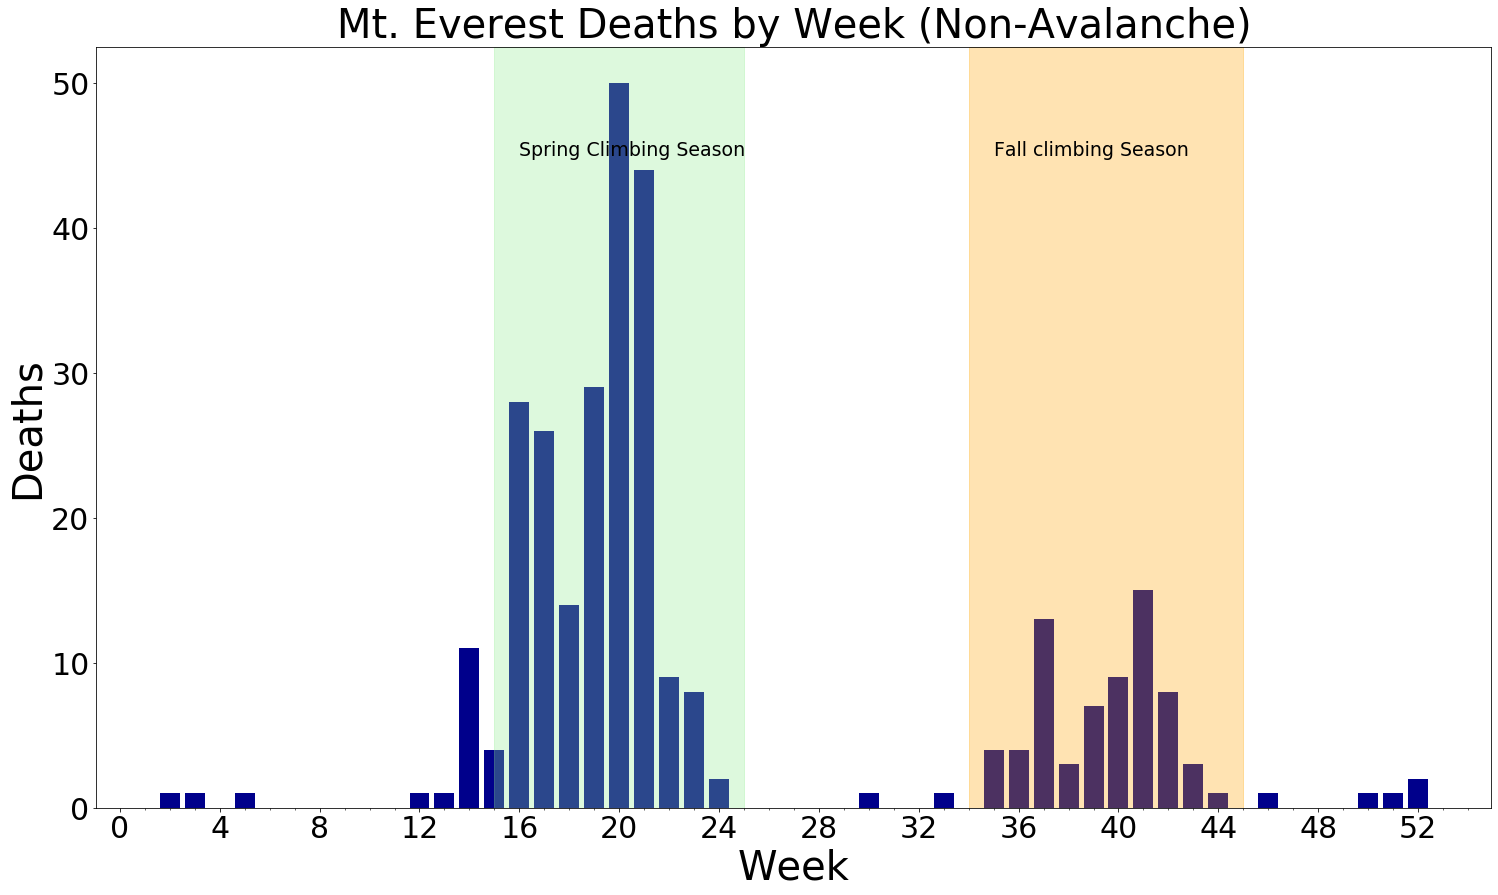

In [84]:
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize']=30
fig,ax = plt.subplots(figsize=(25,14))
ax.bar(deaths_by_week['week'],deaths_by_week['Deaths'],color='darkblue')
ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.axvspan(25,15, alpha=0.3, color='lightgreen')
ax.axvspan(45,34, alpha=0.3, color='orange')
ax.text(16,45, "Spring Climbing Season", fontsize=19)
ax.text(35, 45, "Fall climbing Season", fontsize=19)
ax.set_ylabel('Deaths', fontsize=40) 
ax.set_xlabel('Week', fontsize=40) 
plt.title("Mt. Everest Deaths by Week (Non-Avalanche)",size=40)
plt.xlabel("Week")

In [19]:
summiters=pd.read_csv('summiters.csv')
summiters.head()
del summiters['Unnamed: 0']

In [20]:
summiters.columns=['date']

In [22]:
summiters['date']=pd.to_datetime(summiters['date'],errors=('coerce'))

In [23]:
summiters=summiters.sort_values('date')

In [24]:
summiters['date'].groupby(summiters["date"].dt.day).count()

date
5.0     246
6.0      21
7.0      10
8.0       6
9.0      18
10.0    148
11.0     32
12.0     17
13.0     83
14.0     36
15.0     72
16.0    227
17.0    201
18.0    136
19.0    350
20.0    268
21.0    330
22.0    336
23.0    370
24.0    228
25.0    259
26.0    200
27.0     44
28.0      9
29.0     23
30.0     87
31.0     23
Name: date, dtype: int64

In [25]:
summiters['month']=summiters['date'].dt.month
may_summit=summiters[summiters['month']==5]

In [26]:
may_death=everest_deaths[everest_deaths['month']==5]

In [27]:
na_values=summiters[summiters['date']=="NaT"]

In [28]:
na_values=summiters[summiters.date.isnull()]

In [29]:
na_values

,date,month
53,NaT,NaN
72,NaT,NaN
80,NaT,NaN
111,NaT,NaN
119,NaT,NaN
148,NaT,NaN
185,NaT,NaN
209,NaT,NaN
229,NaT,NaN
292,NaT,NaN


In [30]:
everest_deaths['Date'].groupby(everest_deaths["Date"].dt.week).count()

Date
2      1
3      1
5      1
12     1
14     5
15     4
16     9
17    11
18    12
19    28
20    45
21    30
22     8
23     1
24     2
35     1
36     4
37     2
38     1
39     3
40     9
41    11
42     8
43     2
44     1
46     1
50     1
51     1
52     2
Name: Date, dtype: int64

In [31]:
summiters_per_week=summiters['date'].groupby(summiters['date'].dt.week).count()
summiters_per_week=pd.DataFrame(summiters_per_week)
summiters_per_week.columns=['summits']
summiters_per_week.reset_index()
summiters_per_week=summiters_per_week.reset_index()
summiters_per_week.columns=['week','summits']
#summiters_per_week['summit/death']=(deaths_by_week['Deaths'])/(summiters_per_week['summits'])
summiters_per_week

,week,summits
0,1.0,2
1,2.0,7
2,5.0,14
3,6.0,14
4,7.0,2
5,9.0,4
6,10.0,3
7,11.0,3
8,12.0,1
9,14.0,6


In [32]:
death_summit=pd.merge(summiters_per_week, deaths_by_week, on='week')
death_summit['death/summit']=death_summit['Deaths']/death_summit['summits']
death_summit

,week,summits,Deaths,death/summit
0,2,7,1,0.142857
1,5,14,1,0.071429
2,12,1,1,1.000000
3,14,6,5,0.833333
4,15,13,4,0.307692
5,16,13,9,0.692308
6,17,6,11,1.833333
7,18,70,12,0.171429
8,19,199,28,0.140704
9,20,1218,45,0.036946


In [168]:
import matplotlib.ticker as ticker

Text(0.5,1,'Mt. Everest Deaths per Summit(non-Avalanche)')

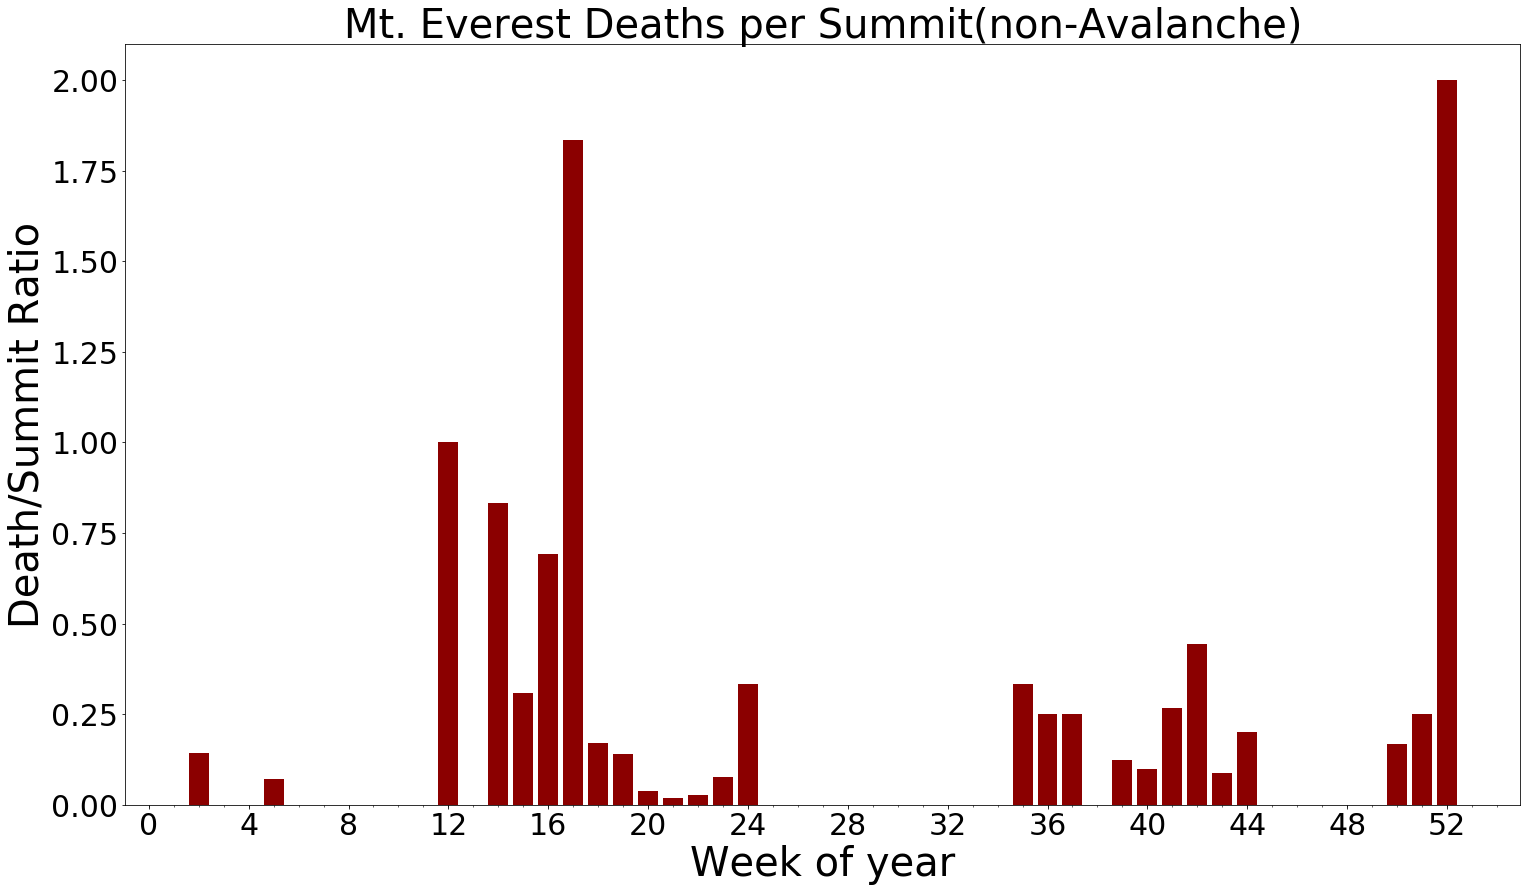

In [33]:
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize']=30
#minorLocator=MultipleLocator(2)
fig,ax = plt.subplots(figsize=(25,14))
ax.bar(death_summit['week'],death_summit['death/summit'],color='darkred')
ax.set_ylabel('Death/Summit Ratio', fontsize=40) 
ax.set_xlabel('Week of year', fontsize=40) 
ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.title("Mt. Everest Deaths per Summit(non-Avalanche)",size=40)


Text(0.5,1,'Mt. Everest Summits')

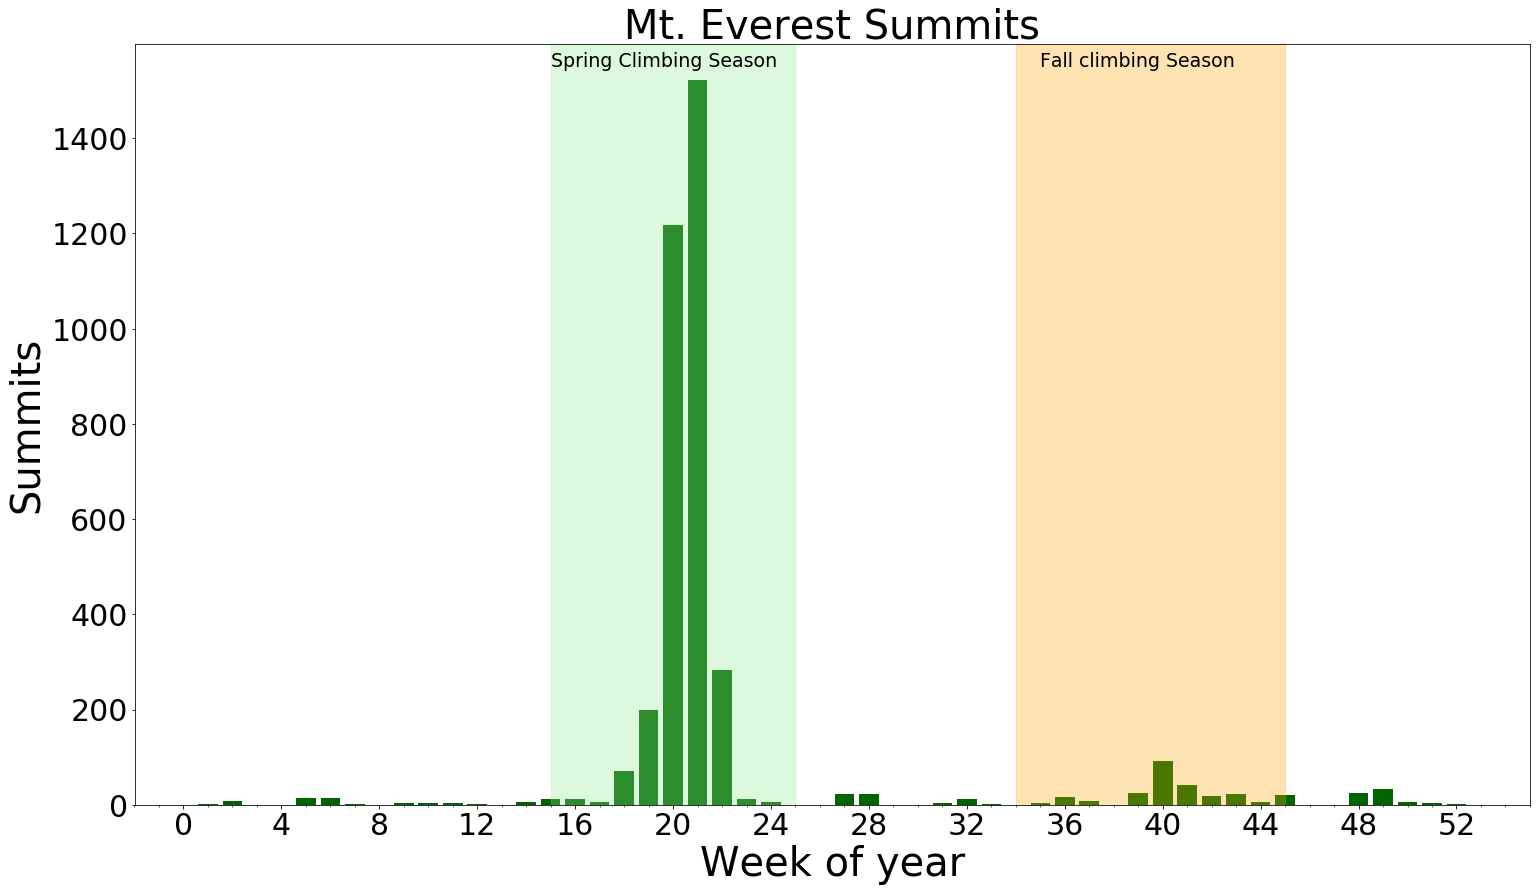

In [34]:
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize']=30
#minorLocator=MultipleLocator(2)
fig,ax = plt.subplots(figsize=(25,14))
ax.bar(summiters_per_week['week'],summiters_per_week['summits'],color='darkgreen')
ax.set_ylabel('Summits', fontsize=40) 
ax.set_xlabel('Week of year', fontsize=40) 
ax.axvspan(25,15, alpha=0.3, color='lightgreen')
ax.axvspan(45,34, alpha=0.3, color='orange')
ax.text(15,1550, "Spring Climbing Season", fontsize=19)
ax.text(35, 1550, "Fall climbing Season", fontsize=19)
ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.title("Mt. Everest Summits",size=40)


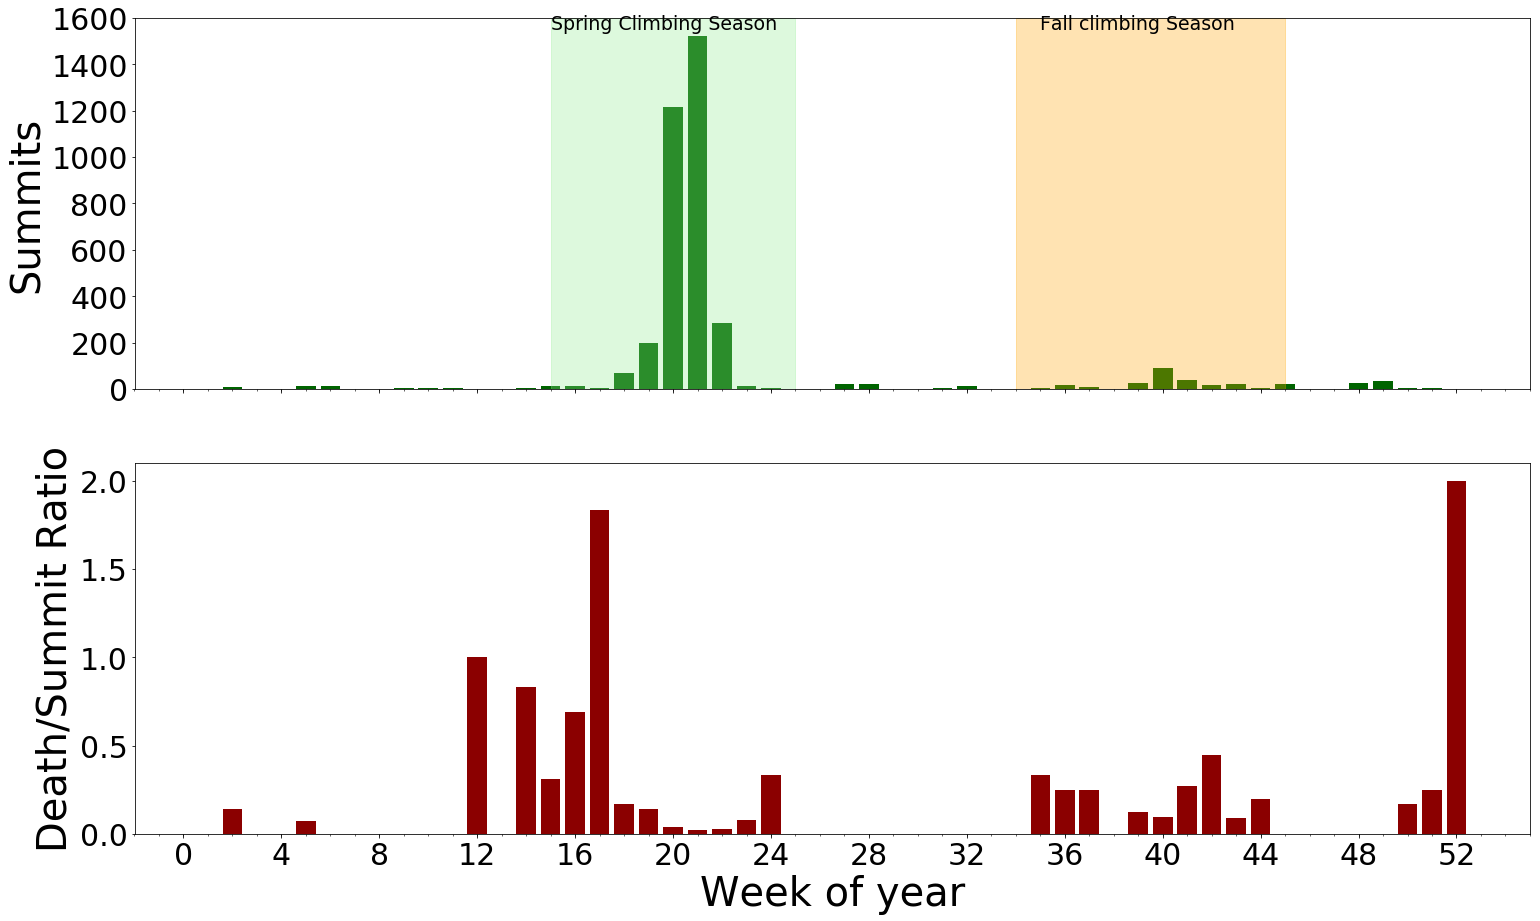

In [38]:

fig,ax = plt.subplots(2,sharex=True,figsize=(25,15))
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize']=30
#minorLocator=MultipleLocator(2)
ax[1].bar(death_summit['week'],death_summit['death/summit'],color='darkred')
ax[1].set_ylabel('Death/Summit Ratio', fontsize=40) 
ax[1].set_xlabel('Week of year', fontsize=40) 
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(4))
ax[1].xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax[0].bar(summiters_per_week['week'],summiters_per_week['summits'],color='darkgreen')
ax[0].set_ylabel('Summits', fontsize=40) 
ax[0].axvspan(25,15, alpha=0.3, color='lightgreen')
ax[0].axvspan(45,34, alpha=0.3, color='orange')
ax[0].text(15,1550, "Spring Climbing Season", fontsize=19)
ax[0].text(35, 1550, "Fall climbing Season", fontsize=19)
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(4))
ax[0].xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax[0].yaxis.set_major_locator(ticker.MultipleLocator(200))
plt.savefig("deathsummit.pdf", bbox_inches='tight')

#ax1.get_shared_x_axes().join(ax1, ax2)
#ax1.set_xticklabels([])


In [39]:
may_death=everest_deaths[everest_deaths['month']==5]
summiters['month']=summiters['date'].dt.month
may_summit=summiters[summiters['month']==5]


In [40]:

may_summit=may_summit['date'].groupby(may_summit['date'].dt.day).count()
may_summit=pd.DataFrame(may_summit)
may_summit.columns=['summits']
may_summit=may_summit.reset_index()


In [41]:
may_death=may_death['Date'].groupby(may_death['Date'].dt.day).count()
may_death=pd.DataFrame(may_death)
may_death.columns=['deaths']
may_death=may_death.reset_index()


In [42]:
may_summit

,date,summits
0,5,43
1,6,7
2,7,9
3,8,6
4,9,18
5,10,11
6,11,32
7,12,17
8,13,73
9,14,21


In [43]:
may_death.columns=['date','deaths']

In [44]:
may_death

,date,deaths
0,1,2
1,2,3
2,3,1
3,4,1
4,5,3
5,6,3
6,7,5
7,8,3
8,9,3
9,10,2


In [45]:

may_death_summit=pd.merge(may_death,may_summit,on='date')
#may_death_summit=['death/summit']=may_death_summit['']
may_death_summit

,date,deaths,summits
0,5,3,43
1,6,3,7
2,7,5,9
3,8,3,6
4,9,3,18
5,10,2,11
6,11,10,32
7,12,2,17
8,13,2,73
9,14,1,21


In [46]:
may_death_summit['death/summit']=may_death_summit['deaths']/may_death_summit['summits']
may_death_summit

,date,deaths,summits,death/summit
0,5,3,43,0.069767
1,6,3,7,0.428571
2,7,5,9,0.555556
3,8,3,6,0.500000
4,9,3,18,0.166667
5,10,2,11,0.181818
6,11,10,32,0.312500
7,12,2,17,0.117647
8,13,2,73,0.027397
9,14,1,21,0.047619


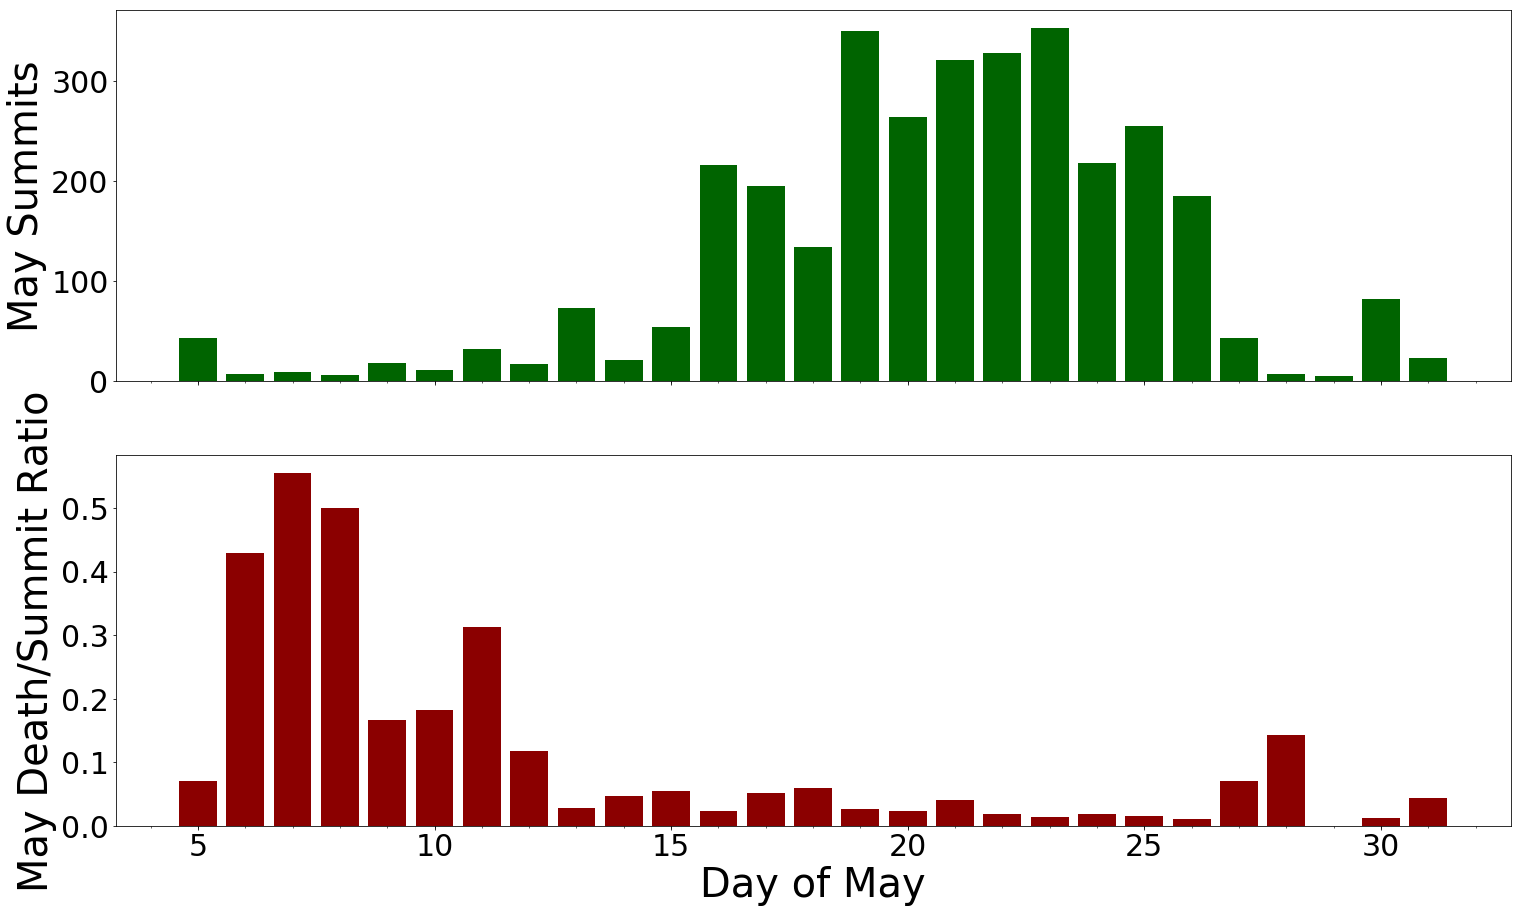

In [47]:
fig,ax = plt.subplots(2,sharex=True,figsize=(25,15))
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize']=30
#minorLocator=MultipleLocator(2)
ax[1].bar(may_death_summit['date'],may_death_summit['death/summit'],color='darkred')
ax[1].set_ylabel('May Death/Summit Ratio', fontsize=40) 
ax[1].set_xlabel('Day of May', fontsize=40) 
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(4))
ax[1].xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax[0].bar(may_summit['date'],may_summit['summits'],color='darkgreen')
ax[0].set_ylabel('May Summits', fontsize=40) 
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(5))
ax[0].xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax[0].yaxis.set_major_locator(ticker.MultipleLocator(100))
plt.savefig("maydeath.pdf", bbox_inches='tight')